# MLNN Hackathon 2025
# Building Smart Image Classification Models

Imagine you’re part of a team at a tech company working on cool projects like automatic image recognition. Your job is to build a smart image classifier using the given dataset:

1. SVHN (Street View House Numbers): A dataset of digits (0-9) extracted from real-world street view images, with challenges like cluttered backgrounds and overlapping numbers. https://www.tensorflow.org/datasets/catalog/svhn_cropped
http://ufldl.stanford.edu/housenumbers/


Your goal is to explore the dataset, build a model using pre-trained deep learning techniques, and make it as accurate as possible. You’ll need to think about how to handle the challenges the dataset might throw at you and document your process along the way.

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import layers, models

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/73257 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/svhn_cropped/incomplete.S4C1V5_3.1.0/svhn_cropped-train.tfrecord*...:   0%…

Generating test examples...:   0%|          | 0/26032 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/svhn_cropped/incomplete.S4C1V5_3.1.0/svhn_cropped-test.tfrecord*...:   0%|…

Generating extra examples...:   0%|          | 0/531131 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/svhn_cropped/incomplete.S4C1V5_3.1.0/svhn_cropped-extra.tfrecord*...:   0%…

Dataset svhn_cropped downloaded and prepared to /root/tensorflow_datasets/svhn_cropped/3.1.0. Subsequent calls will reuse this data.
SVHN Dataset Info:
Number of training examples: 73257
Number of test examples: 26032
Classes: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
Subset Training data shape: (5000, 32, 32, 3)
Subset Test data shape: (5000, 32, 32, 3)


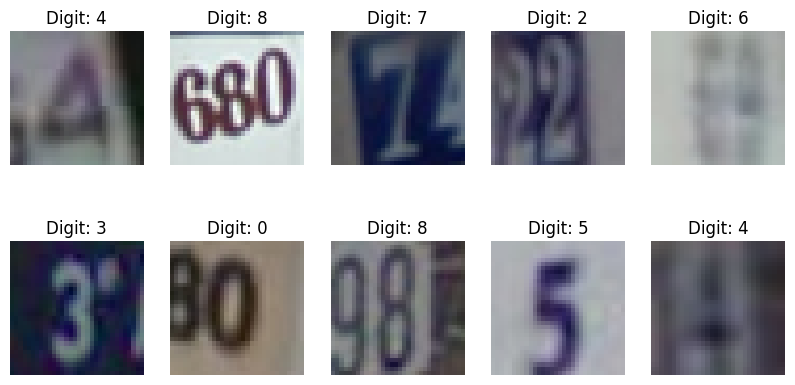

In [ ]:
# Loading SVHN Dataset
dataset, info = tfds.load('svhn_cropped', as_supervised=True, with_info=True)

train_dataset = dataset['train']
test_dataset = dataset['test']

print("SVHN Dataset Info:")
print(f"Number of training examples: {info.splits['train'].num_examples}")
print(f"Number of test examples: {info.splits['test'].num_examples}")
print(f"Classes: {info.features['label'].names}")

# Converting Dataset to NumPy for Subsetting
def convert_to_numpy(tf_dataset, num_samples=None):
    """Convert a TF dataset to NumPy arrays."""
    images, labels = [], []
    for img, label in tf_dataset.take(num_samples or -1):
        images.append(img.numpy())
        labels.append(label.numpy())
    return np.array(images), np.array(labels)

# Subsetting the Dataset if Needed
max_samples = 5000  # Adjust this as needed
x_train, y_train = convert_to_numpy(train_dataset, num_samples=max_samples)
x_test, y_test = convert_to_numpy(test_dataset, num_samples=max_samples)

print(f"Subset Training data shape: {x_train.shape}")
print(f"Subset Test data shape: {x_test.shape}")

# Visualizing Sample Images from the Subset
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i])
    plt.title(f"Digit: {y_train[i]}")
    plt.axis('off')
plt.show()


Number of images per class:
[354 953 665 572 530 455 395 398 344 334]


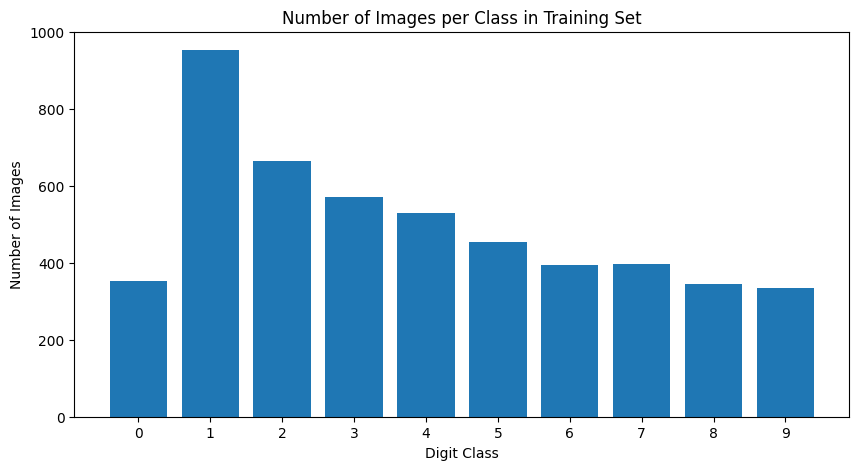

In [ ]:
# Number of images per class
class_counts = np.bincount(y_train)
print(f"Number of images per class:\n{class_counts}")

# Creating the bar graph
plt.figure(figsize=(10, 5))
plt.bar(np.arange(len(class_counts)), class_counts)
plt.xlabel("Digit Class")
plt.ylabel("Number of Images")
plt.title("Number of Images per Class in Training Set")
plt.xticks(np.arange(len(class_counts)))  # Ensure all x-axis labels are shown
plt.show()

In [ ]:
# EfficientNetB0 Model Setup
base_model = EfficientNetB0(
    include_top=False,
    weights="imagenet",
    input_shape=(32, 32, 3)  # Use the native size of the dataset
)

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.2),
    layers.Dense(10, activation="softmax")  # 10 classes for digits
])

# Compile the Model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss="sparse_categorical_crossentropy",  # Numerical labels
    metrics=["accuracy"]
)

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 117s 404ms/step - accuracy: 0.2650 - loss: 2.2472 - val_accuracy: 0.4630 - val_loss: 1.7075
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 78s 382ms/step - accuracy: 0.5975 - loss: 1.2047 - val_accuracy: 0.6718 - val_loss: 1.0982
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 62s 394ms/step - accuracy: 0.7329 - loss: 0.8365 - val_accuracy: 0.7668 - val_loss: 0.9387
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 79s 378ms/step - accuracy: 0.8052 - loss: 0.6337 - val_accuracy: 0.7968 - val_loss: 0.6932
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 83s 384ms/step - accuracy: 0.8499 - loss: 0.4799 - val_accuracy: 0.8020 - val_loss: 0.6686
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 69s 438ms/step - accuracy: 0.8558 - loss: 0.4774 - val_accuracy: 0.8230 - val_loss: 0.6966
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 71s 369ms/step - accuracy: 0.8923 - loss: 0.3373 - val_accuracy: 0.8198 - val_loss: 0.6602
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 59s 373ms/step - accuracy: 0.8925 - loss: 

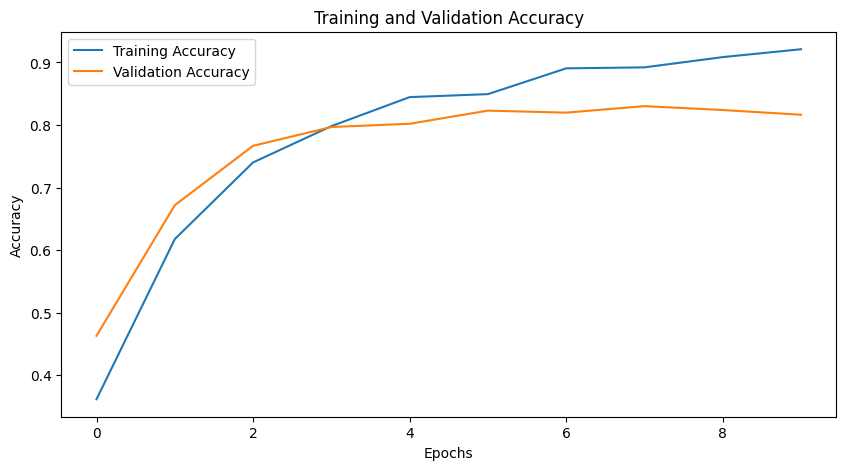

157/157 ━━━━━━━━━━━━━━━━━━━━ 16s 78ms/step


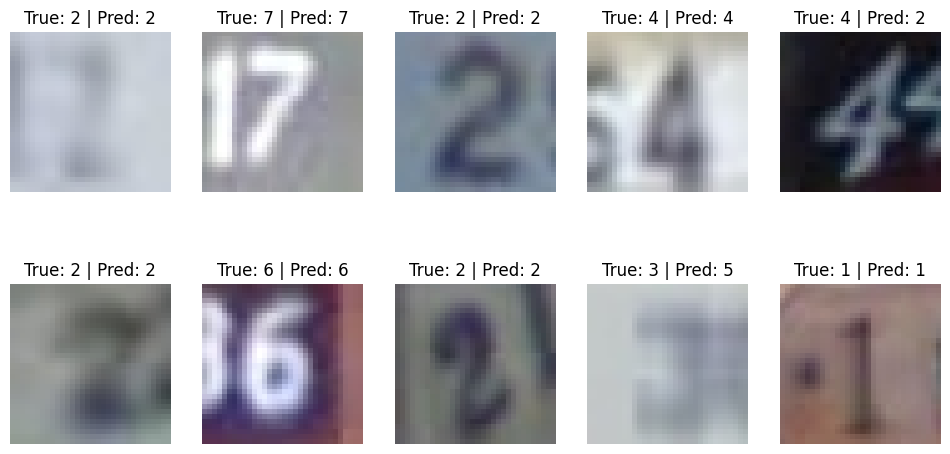

In [ ]:
# Train the Model
history = model.fit(
    x_train,  # Use raw dataset
    y_train,
    validation_data=(x_test, y_test),
    epochs=10,
    batch_size=32
)

# Evaluating the Model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Visualizing Training and Validation Accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Predicting and Classifing Images
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

# Visualizing Predictions
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i])
    plt.title(f"True: {y_test[i]} | Pred: {predicted_labels[i]}")
    plt.axis('off')
plt.show()

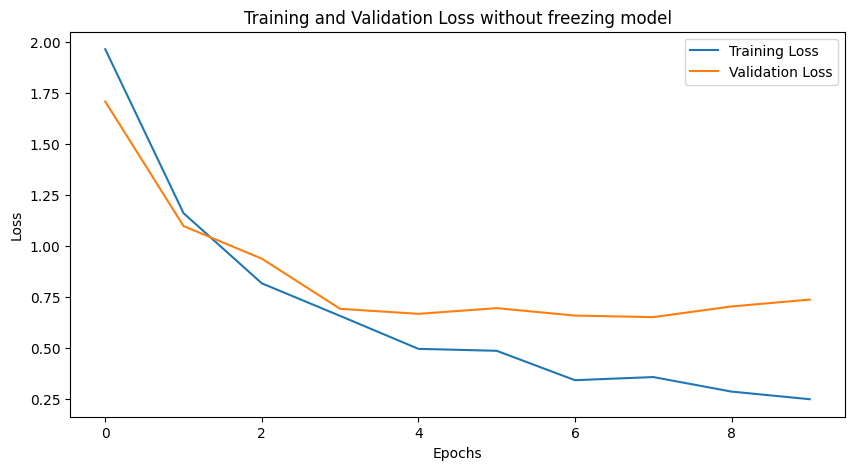

In [ ]:
# Visualizing Training and Validation Loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss without')
plt.show()

In [ ]:
# Calculating precision, recall, F1 score, and accuracy
precision = precision_score(y_test, predicted_labels, average='macro')
recall = recall_score(y_test, predicted_labels, average='macro')
f1 = f1_score(y_test, predicted_labels, average='macro')
accuracy = accuracy_score(y_test, predicted_labels)

# Printing the metrics
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")

Precision: 0.7993
Recall: 0.7919
Accuracy: 0.8164
F1 Score: 0.7927


157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 80ms/step


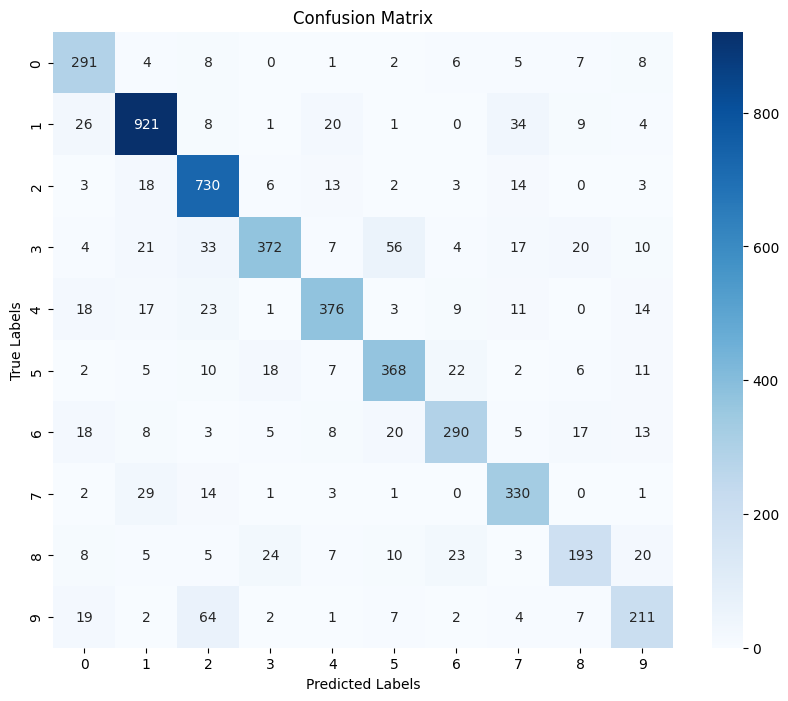

              precision    recall  f1-score   support

           0       0.74      0.88      0.80       332
           1       0.89      0.90      0.90      1024
           2       0.81      0.92      0.86       792
           3       0.87      0.68      0.76       544
           4       0.85      0.80      0.82       472
           5       0.78      0.82      0.80       451
           6       0.81      0.75      0.78       387
           7       0.78      0.87      0.82       381
           8       0.75      0.65      0.69       298
           9       0.72      0.66      0.69       319

    accuracy                           0.82      5000
   macro avg       0.80      0.79      0.79      5000
weighted avg       0.82      0.82      0.81      5000



In [26]:
# Predicting and Classifying Images
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_test, predicted_labels)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print(classification_report(y_test, predicted_labels))